<h1 align='center'><b>Введение в нейронные сети<b></h1>

<h2 align='center'>Урок 5. Рекуррентные нейронные сети</h2>

<h3 align='left'>Практическое задание</h3>  
<ol>
    <li>Попробуйте изменить параметры нейронной сети работающей с датасетом imdb либо нейронной сети работающей airline-passengers(она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить ее точность. Приложите анализ.</li>
    <li>Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.</li>
    <li>* Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM</li>
    <li>* Предложите свои варианты решения проблемы исчезающего градиента в RNN</li>
</ol>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

### Исходное решение

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
np.random.seed(7)

In [ ]:
# dataframe = read_csv('data/airline-passengers.csv', usecols=[1])
dataframe = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/22_введение_в_нейронные_сети/Lesson_5/data/airline-passengers.csv", usecols=[1])
dataframe.head(10)

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset[:10]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753]], dtype=float32)

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

92/92 - 1s - loss: 0.0059 - 1s/epoch - 16ms/step
92/92 - 0s - loss: 0.0164 - 229ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0111 - 256ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0080 - 225ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0062 - 229ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0052 - 223ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0046 - 223ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0043 - 232ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0042 - 240ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0041 - 244ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0041 - 240ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0040 - 253ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0040 - 237ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0040 - 235ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0039 - 238ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0039 - 245ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0039 - 219ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0039 - 236ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0038 - 236ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0038 - 251ms

In [ ]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

44/44 [==============================] - 0s 2ms/step


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 25.74 RMSE
Test Score: 73.13 RMSE


In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

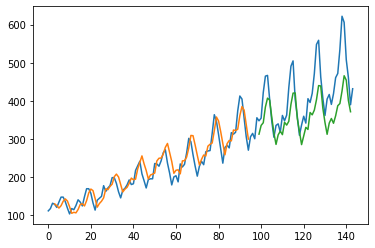

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
results = pd.DataFrame() # сводная таблица результатов
model = [] # шаг
train = [] # результат на трейне
test = [] # результат на тесте

In [ ]:
model.append('Baseline')
train.append(round(trainScore, 2))
test.append(round(testScore,2))

### 1. Попробуйте изменить параметры нейронной сети работающей с датасетом imdb либо нейронной сети работающей airline-passengers(она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить ее точность. Приложите анализ.

In [ ]:
# df = pd.read_csv('data/airline-passengers.csv')
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/22_введение_в_нейронные_сети/Lesson_5/data/airline-passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.shape

(144, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df['Month'].value_counts()

1949-01    1
1949-02    1
1956-09    1
1956-10    1
1956-11    1
          ..
1953-01    1
1953-02    1
1953-03    1
1953-04    1
1960-12    1
Name: Month, Length: 144, dtype: int64

Разделим дату отдельно на год и месяц

In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
def parse_date(df, date_feature_name):
    date_list = df[date_feature_name]
    years = []
    months = []
    for el in date_list:
        years.append(el.year)
        months.append(el.month)
    df['year'] = years
    df['month'] = months
    
    return df

In [ ]:
df = parse_date(df, 'Month')

Отбросим первый столбец, т.к. признаки [year, mon] его представляют.

In [ ]:
df = df.iloc[:, 1:]
df.head()

,Passengers,year,month
0,112,1949,1
1,118,1949,2
2,132,1949,3
3,129,1949,4
4,121,1949,5


Разбиваем выборку на обучение и на тест.

In [ ]:
train_size = 100

# список признаков, по которым будем учить
feat = ['Passengers', 'year', 'month']

# отступ теста от тренировки
bias = 5

# делим
train_data = df.iloc[:train_size][feat]
val_data = df.iloc[train_size + bias:][feat]

train_data.shape, val_data.shape

((100, 3), (39, 3))

Создаем данные для обучения

In [ ]:
features = train_data.columns[1:]
target = train_data.columns[0]

In [ ]:
scaler = StandardScaler()

train_data[features] = scaler.fit_transform(train_data[features])
val_data[features] = scaler.transform(val_data[features])

train_data.head()

,Passengers,year,month
0,112,-1.525724,-1.534863
1,118,-1.525724,-1.247435
2,132,-1.525724,-0.960008
3,129,-1.525724,-0.672580
4,121,-1.525724,-0.385153


Формируем параметры для генерации выборки

In [ ]:
# длина истории
x_len = 3

# горизонт предсказания
future = 1

# параметры модели для обучения
learning_rate = 0.001
batch_size = 8
epochs = 10

In [ ]:
start = x_len + future
end = start + train_size

print(start, end)

X_train = train_data[features].values
y_train = df.iloc[start:end][target].values


x_end = len(val_data) - x_len - future
label_start = len(train_data) + bias + x_len + future
print(x_end, label_start)

X_val = val_data.iloc[:x_end][features].values
y_val = df.iloc[label_start:][target].values

4 104
35 109


In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((100, 2), (100,), (35, 2), (35,))

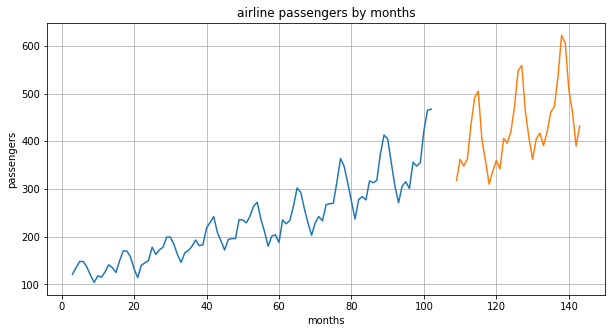

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index[x_len:y_train.shape[0]+x_len],y_train[:])
plt.plot(df.index[y_train.shape[0]+x_len+bias+future:],y_val[:])
plt.grid('on')
plt.xlabel('months')
plt.ylabel('passengers')
plt.title('airline passengers by months')
plt.show()

In [ ]:
# скомпануем батч объектов для предсказания нового объекта

dataset_train = timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

dataset_val = timeseries_dataset_from_array(
    X_val,
    y_val,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

In [ ]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    print("Input shape:", inputs.shape)
    print(inputs[1])
    print("Target shape:", targets.shape)
    print(targets[1])

Input shape: (8, 3, 2)
tf.Tensor(
[[-1.52572369 -1.24743549]
 [-1.52572369 -0.96000796]
 [-1.52572369 -0.67258043]], shape=(3, 2), dtype=float64)
Target shape: (8,)
tf.Tensor(135, shape=(), dtype=int64)


**LSTM**

In [ ]:
model_1 = Sequential()

model_1.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
               return_sequences=True))
model_1.add(Conv1D(32, 1, activation='linear'))
model_1.add(Flatten())
model_1.add(Dense(1, activation='linear'))

model_1.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 3, 32)             4480      
                                                                 
 conv1d_3 (Conv1D)           (None, 3, 32)             1056      
                                                                 
 flatten_2 (Flatten)         (None, 96)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 97        
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    )

Epoch 1/10
13/13 [==============================] - 3s 45ms/step - loss: 56707.6484 - root_mean_squared_error: 238.1337 - val_loss: 193340.8125 - val_root_mean_squared_error: 439.7054
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: 56617.1875 - root_mean_squared_error: 237.9437 - val_loss: 193023.7656 - val_root_mean_squared_error: 439.3447
Epoch 3/10
13/13 [==============================] - 0s 10ms/step - loss: 56523.4023 - root_mean_squared_error: 237.7465 - val_loss: 192632.1719 - val_root_mean_squared_error: 438.8988
Epoch 4/10
13/13 [==============================] - 0s 10ms/step - loss: 56392.1055 - root_mean_squared_error: 237.4702 - val_loss: 192085.8125 - val_root_mean_squared_error: 438.2759
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 56194.3711 - root_mean_squared_error: 237.0535 - val_loss: 191255.3125 - val_root_mean_squared_error: 437.3275
Epoch 6/10
13/13 [==============================] - 0s 11ms/step - loss: 55885.96

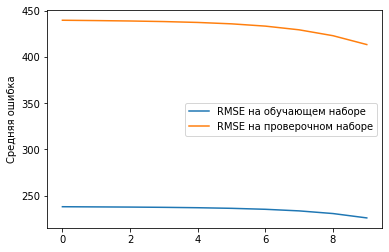

In [ ]:
plt.plot(history_1.history['root_mean_squared_error'][:], 
         label='RMSE на обучающем наборе')
plt.plot(history_1.history['val_root_mean_squared_error'][:], 
         label='RMSE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
hist_train_1 = history_1.history['root_mean_squared_error']
hist_val_1 = history_1.history['val_root_mean_squared_error']

In [ ]:
num_iteration = 10

Epoch 1/10
13/13 [==============================] - 0s 11ms/step - loss: 47786.8555 - root_mean_squared_error: 218.6020 - val_loss: 159944.0938 - val_root_mean_squared_error: 399.9301
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: 43142.7773 - root_mean_squared_error: 207.7084 - val_loss: 146132.0781 - val_root_mean_squared_error: 382.2722
Epoch 3/10
13/13 [==============================] - 0s 10ms/step - loss: 37248.7188 - root_mean_squared_error: 192.9993 - val_loss: 130277.8203 - val_root_mean_squared_error: 360.9402
Epoch 4/10
13/13 [==============================] - 0s 11ms/step - loss: 30533.5078 - root_mean_squared_error: 174.7384 - val_loss: 113569.7188 - val_root_mean_squared_error: 337.0011
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 23660.6582 - root_mean_squared_error: 153.8202 - val_loss: 97115.7734 - val_root_mean_squared_error: 311.6340
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: 17326.4277

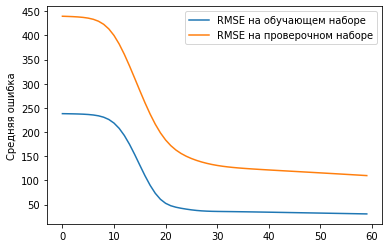

Epoch 1/10
13/13 [==============================] - 0s 10ms/step - loss: 928.2861 - root_mean_squared_error: 30.4678 - val_loss: 11948.2646 - val_root_mean_squared_error: 109.3081
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 916.5963 - root_mean_squared_error: 30.2753 - val_loss: 11805.2988 - val_root_mean_squared_error: 108.6522
Epoch 3/10
13/13 [==============================] - 0s 10ms/step - loss: 904.9477 - root_mean_squared_error: 30.0823 - val_loss: 11661.7197 - val_root_mean_squared_error: 107.9894
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 893.3502 - root_mean_squared_error: 29.8890 - val_loss: 11517.4541 - val_root_mean_squared_error: 107.3194
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 881.8248 - root_mean_squared_error: 29.6955 - val_loss: 11372.4482 - val_root_mean_squared_error: 106.6417
Epoch 6/10
13/13 [==============================] - 0s 11ms/step - loss: 870.4061 - root_mean_squared_

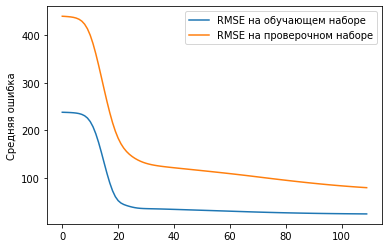

In [ ]:
for iteration in range(num_iteration):
    history_1 = model_1.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    )
    hist_val_1.extend(history_1.history['val_root_mean_squared_error'][:])
    hist_train_1.extend(history_1.history['root_mean_squared_error'][:])
    
    if (iteration + 1) % 5 == 0:
        plt.plot(hist_train_1, 
                 label='RMSE на обучающем наборе')
        plt.plot(hist_val_1, 
                 label='RMSE на проверочном наборе')

        plt.ylabel('Средняя ошибка')
        plt.legend()
        plt.show() 

Проверяем результаты

In [ ]:
pred_1 = model_1.predict(dataset_train).flatten()
pred_val_1 = model_1.predict(dataset_val).flatten()

5/5 [==============================] - 0s 4ms/step


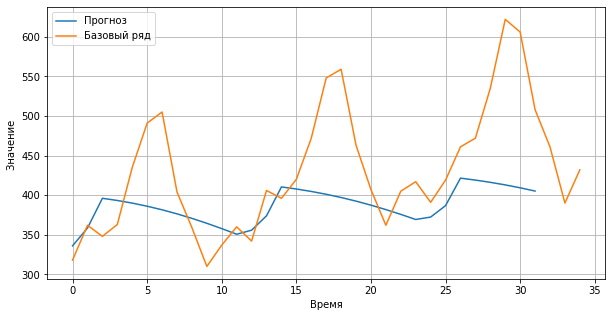

In [ ]:
start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_val_1[future + start: future + start + step], 
         label='Прогноз')
plt.plot(y_val.flatten()[start: start+step], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение ')

plt.legend()
plt.show()

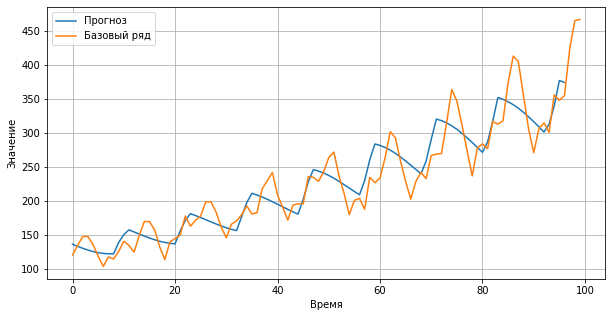

In [ ]:
start = 0

plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_1[future + start: future + train_size], 
         label='Прогноз')
plt.plot(y_train.flatten()[start: train_size], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

In [ ]:
train_loss_1, train_1 = model_1.evaluate(dataset_train)
test_loss_1, test_1 = model_1.evaluate(dataset_val)
print(f'train_loss: {train_loss_1}, train_m: {train_1}')
print(f'test_loss: {test_loss_1}, test_m: {test_1}')

model.append('LSTM')
train.append(round(train_1,2))
test.append(round(test_1,2))

5/5 [==============================] - 0s 6ms/step - loss: 6368.0825 - root_mean_squared_error: 79.8003
train_loss: 605.1249389648438, train_m: 24.599287033081055
test_loss: 6368.08251953125, test_m: 79.80026245117188


**LSTM_tuned**

In [ ]:
early_stop = EarlyStopping(monitor='val_root_mean_squared_error', patience=10)

model_2 = Sequential()

model_2.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
                return_sequences=True))
model_2.add(LSTM(32, return_sequences=True))
model_2.add(Conv1D(64, 3, activation='linear'))
model_2.add(Conv1D(64, 1, activation='linear'))
model_2.add(Flatten())
model_2.add(Dense(3, activation='linear'))
model_2.add(Dense(1, activation='linear'))

model_2.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 32)             4480      
                                                                 
 lstm_7 (LSTM)               (None, 3, 32)             8320      
                                                                 
 conv1d_4 (Conv1D)           (None, 1, 64)             6208      
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 64)             4160      
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
history_2 = model_2.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop])

Epoch 1/10
13/13 [==============================] - 4s 70ms/step - loss: 56633.3477 - root_mean_squared_error: 237.9776 - val_loss: 192987.6406 - val_root_mean_squared_error: 439.3036
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 56244.6797 - root_mean_squared_error: 237.1596 - val_loss: 191724.6406 - val_root_mean_squared_error: 437.8637
Epoch 3/10
13/13 [==============================] - 0s 11ms/step - loss: 55035.3477 - root_mean_squared_error: 234.5961 - val_loss: 186985.3125 - val_root_mean_squared_error: 432.4180
Epoch 4/10
13/13 [==============================] - 0s 11ms/step - loss: 50792.4688 - root_mean_squared_error: 225.3718 - val_loss: 169157.2500 - val_root_mean_squared_error: 411.2873
Epoch 5/10
13/13 [==============================] - 0s 12ms/step - loss: 37384.8359 - root_mean_squared_error: 193.3516 - val_loss: 111861.2812 - val_root_mean_squared_error: 334.4567
Epoch 6/10
13/13 [==============================] - 0s 12ms/step - loss: 9154.86

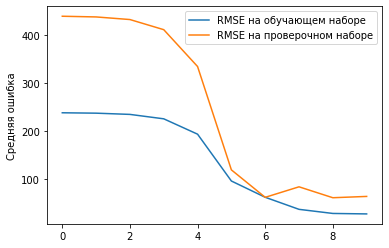

In [ ]:
plt.plot(history_2.history['root_mean_squared_error'][:], 
         label='RMSE на обучающем наборе')
plt.plot(history_2.history['val_root_mean_squared_error'][:], 
         label='RMSE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
hist_train_2 = history_2.history['root_mean_squared_error']
hist_val_2 = history_2.history['val_root_mean_squared_error']

In [ ]:
# num_iteration = 10

Epoch 1/10
13/13 [==============================] - 0s 12ms/step - loss: 702.8041 - root_mean_squared_error: 26.5105 - val_loss: 4124.3745 - val_root_mean_squared_error: 64.2213
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 694.9125 - root_mean_squared_error: 26.3612 - val_loss: 3892.6443 - val_root_mean_squared_error: 62.3911
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: 676.3104 - root_mean_squared_error: 26.0060 - val_loss: 3969.1897 - val_root_mean_squared_error: 63.0015
Epoch 4/10
13/13 [==============================] - 0s 11ms/step - loss: 672.5323 - root_mean_squared_error: 25.9332 - val_loss: 3808.2556 - val_root_mean_squared_error: 61.7111
Epoch 5/10
13/13 [==============================] - 0s 12ms/step - loss: 665.0240 - root_mean_squared_error: 25.7881 - val_loss: 3787.8972 - val_root_mean_squared_error: 61.5459
Epoch 6/10
13/13 [==============================] - 0s 11ms/step - loss: 660.4916 - root_mean_squared_error: 2

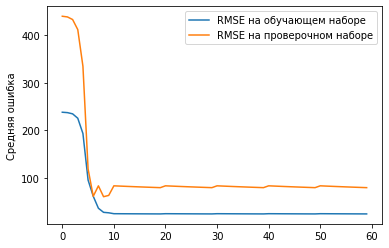

Epoch 1/10
13/13 [==============================] - 0s 12ms/step - loss: 602.1035 - root_mean_squared_error: 24.5378 - val_loss: 3049.2561 - val_root_mean_squared_error: 55.2201
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 601.0270 - root_mean_squared_error: 24.5159 - val_loss: 3040.5105 - val_root_mean_squared_error: 55.1408
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: 599.9118 - root_mean_squared_error: 24.4931 - val_loss: 3031.5583 - val_root_mean_squared_error: 55.0596
Epoch 4/10
13/13 [==============================] - 0s 11ms/step - loss: 598.7551 - root_mean_squared_error: 24.4695 - val_loss: 3022.3894 - val_root_mean_squared_error: 54.9763
Epoch 5/10
13/13 [==============================] - 0s 13ms/step - loss: 597.5538 - root_mean_squared_error: 24.4449 - val_loss: 3012.9885 - val_root_mean_squared_error: 54.8907
Epoch 6/10
13/13 [==============================] - 0s 11ms/step - loss: 596.3052 - root_mean_squared_error: 2

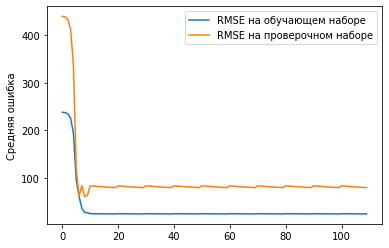

In [ ]:
for iteration in range(num_iteration):
    history_2 = model_2.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop])
    hist_val_2.extend(history_1.history['val_root_mean_squared_error'][:])
    hist_train_2.extend(history_1.history['root_mean_squared_error'][:])
    
    if (iteration + 1) % 5 == 0:
        plt.plot(hist_train_2, 
                 label='RMSE на обучающем наборе')
        plt.plot(hist_val_2, 
                 label='RMSE на проверочном наборе')

        plt.ylabel('Средняя ошибка')
        plt.legend()
        plt.show() 

Проверяем результаты

In [ ]:
pred_2 = model_2.predict(dataset_train).flatten()
pred_val_2 = model_2.predict(dataset_val).flatten()

5/5 [==============================] - 0s 4ms/step


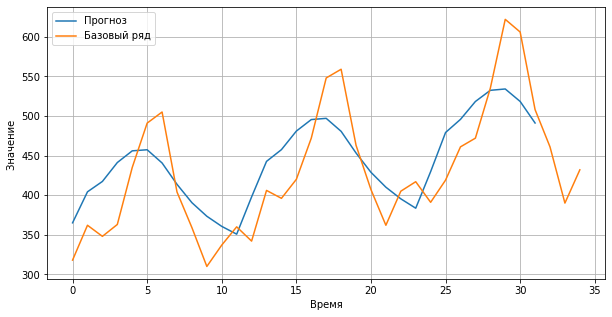

In [ ]:
start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_val_2[future + start: future + start + step], 
         label='Прогноз')
plt.plot(y_val.flatten()[start: start+step], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение ')

plt.legend()
plt.show()

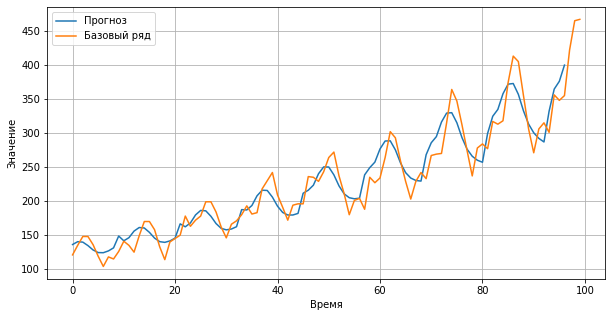

In [ ]:
start = 0

plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_2[future + start: future + train_size], 
         label='Прогноз')
plt.plot(y_train.flatten()[start: train_size], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

In [ ]:
train_loss_2, train_2 = model_2.evaluate(dataset_train)
test_loss_2, test_2 = model_2.evaluate(dataset_val)
print(f'train_loss: {train_loss_2}, train_m: {train_2}')
print(f'test_loss: {test_loss_2}, test_m: {test_2}')

model.append('LSTM_tuned')
train.append(round(train_2,2))
test.append(round(test_2,2))

5/5 [==============================] - 0s 5ms/step - loss: 1671.9977 - root_mean_squared_error: 40.8901
train_loss: 276.7460632324219, train_m: 16.63568687438965
test_loss: 1671.9976806640625, test_m: 40.89006805419922


In [ ]:
results['model'] = model
results['train'] = train
results['test'] = test

In [ ]:
results

,model,train,test
0,Baseline,25.74,73.13
1,LSTM,24.60,79.80
2,LSTM_tuned,16.64,40.89


**Вывод**  
Как можно видеть из таблицы, минимальная LSTM показывает результат хуже, чем базовый. При добавлении ещё одного слоя LSTM и добавив конвалюцию, далее растянув всё в один вектор и сделав полносвязанную классификацию, получили лучшый результат.

### 2. Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.

In [ ]:
# with open("data/alice_in_wonderland.txt", 'rb') as _in:
with open("/content/drive/MyDrive/Colab_Notebooks/22_введение_в_нейронные_сети/Lesson_5/data/alice_in_wonderland.txt", 'rb') as _in:  
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)

# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID and a specific character. The numerical ID will correspond to a column
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 100, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])
    
# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y
# X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
# y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=bool)
y = np.zeros((len(input_chars), nb_chars), dtype=bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1
    
# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 128, 128
NUM_ITERATIONS = 5 #20 # 25 должно быть достаточно
NUM_EPOCHS_PER_ITERATION = 20 #20
NUM_PREDS_PER_EPOCH = 20 #100

# Create a super simple recurrent neural network. There is one recurrent
# layer that produces an embedding of size HIDDEN_SIZE from the one-hot
# encoded input layer. This is followed by a Dense fully-connected layer
# across the set of possible next characters, which is converted to a
# probability score via a standard softmax activation with a multi-class
# cross-entropy loss function linking the prediction to the one-hot
# encoding character label.

'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный 
закодированный входной слой. 
За ним последует полносвязный слой связанный с набором возможных следующих символов, 
которые конвертированы в вероятностные результаты через стандартную softmax 
активацию с multi-class cross-encoding loss функцию ссылающуются на 
предсказание one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    GRU(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")

# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):
    
    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)
    
    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    
    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):
        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1
        
        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]
        
        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")
        
        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred
        
print()        

Итерация #: 0
Epoch 1/20
1240/1240 [==============================] - 83s 52ms/step - loss: 2.2930
Epoch 2/20
1240/1240 [==============================] - 66s 53ms/step - loss: 1.9046
Epoch 3/20
1240/1240 [==============================] - 67s 54ms/step - loss: 1.7447
Epoch 4/20
1240/1240 [==============================] - 72s 58ms/step - loss: 1.6396
Epoch 5/20
1240/1240 [==============================] - 69s 56ms/step - loss: 1.5609
Epoch 6/20
1240/1240 [==============================] - 68s 55ms/step - loss: 1.4976
Epoch 7/20
1240/1240 [==============================] - 67s 54ms/step - loss: 1.4452
Epoch 8/20
1240/1240 [==============================] - 71s 57ms/step - loss: 1.4008
Epoch 9/20
1240/1240 [==============================] - 68s 55ms/step - loss: 1.3625
Epoch 10/20
1240/1240 [==============================] - 68s 55ms/step - loss: 1.3295
Epoch 11/20
1240/1240 [==============================] - 67s 54ms/step - loss: 1.3006
Epoch 12/20
1240/1240 [==========================

**Вывод**  
Были изменены гиперпараметры модели, такие как количество эпох и количество предсказаний в эпоху. Данные изменения дали положительный результат. Генерируемый моделью текст стал более осмысленным.